# Make plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../reports/task1_predict_task_performance.csv")
df.head()

,LM,rte,cola,qnli,mrpc,sst2,qqp,bigram_shift_layer_0,coordination_inversion_layer_0,obj_number_layer_0,...,past_present_layer_11,subj_number_layer_11,tree_depth_layer_11,bigram_shift_layer_12,coordination_inversion_layer_12,obj_number_layer_12,odd_man_out_layer_12,past_present_layer_12,subj_number_layer_12,tree_depth_layer_12
0,embeddings_roberta_base,0.7726,0.8437,0.9251,0.8995,0.9438,0.9143,0.5,0.5,0.5,...,0.857333,0.793333,0.283714,0.850667,0.654333,0.787333,0.619667,0.879667,0.815333,0.295238
1,embeddings_roberta_base_corr_500,0.7148,0.8322,0.9213,0.8750,0.9415,0.9164,0.5,0.5,0.5,...,0.865333,0.704333,0.250381,0.685667,0.546667,0.813000,0.582667,0.868000,0.806000,0.294857
2,embeddings_roberta_base_corr_1000,0.7040,0.8380,0.9213,0.8824,0.9392,0.9160,0.5,0.5,0.5,...,0.819000,0.721333,0.259905,0.605667,0.547000,0.810000,0.564333,0.864333,0.814667,0.297714
3,embeddings_roberta_base_corr_2000,0.6859,0.8341,0.9185,0.8824,0.9415,0.9166,0.5,0.5,0.5,...,0.864333,0.747667,0.276190,0.579000,0.539333,0.810000,0.560667,0.870333,0.812000,0.301143
4,embeddings_roberta_base_corr_4000,0.5848,0.8399,0.9209,0.8873,0.9450,0.9165,0.5,0.5,0.5,...,0.864333,0.785667,0.284190,0.559333,0.540667,0.804333,0.570667,0.865333,0.810333,0.302667


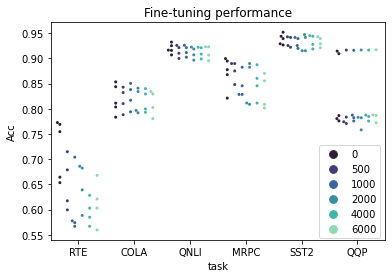

In [3]:
def make_plot(df):
    plotdata = {"task": [], "Acc": [], "corruption_step": []}
    tasks = ["rte", "cola", "qnli", "mrpc", "sst2", "qqp"]
    for i, row in df.iterrows():
        for t in tasks:
            name = row["LM"]
            suffix = name.split("_")[-1]
            if suffix.isnumeric():
                plotdata["corruption_step"].append(int(suffix))
            else:
                plotdata["corruption_step"].append(0)
            plotdata["task"].append(t.upper())
            plotdata["Acc"].append(row[t])
    plotdata = pd.DataFrame(plotdata)
    fig = plt.figure()
    ax = plt.subplot(111)
    #sns.boxplot(data=plotdata, y="Acc", x="task", palette="pastel")
    sns.swarmplot(data=plotdata, y="Acc", x="task", size=3,
                  hue="corruption_step", palette="mako", dodge=True)
    ax.legend(bbox_to_anchor=(1.0, 0.46))
    ax.set_title("Fine-tuning performance")
    plt.savefig("glue_accuracies.svg")
    
make_plot(df)